In [313]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io
import matplotlib.pyplot as plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


**Section 2 - Import Data**

In [314]:
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

**Section 3 - Show Dataset Ad**

In [315]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [316]:
data.head() #Shows top 5 records of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [317]:
data.tail() #Shows last 5 records of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [318]:
data.shape # Shows rows and columns 

(7787, 12)

In [319]:
data.size # Shows total elements in dataset

93444

In [320]:
data.columns # Shows each columns name

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [321]:
data.dtypes # Shows the data type for each column

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [322]:
data.info()  # Shows Indecies, Columns, Data Types, Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Identify Duplicates and removing them**

In [323]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicates were identified.

**Identify Null Values and show them with a Heat-map.**

In [324]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [325]:
data.isnull()  # Shows where Null Value is in dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [326]:
data.isnull().sum()   # Shows count of Null Values in each column

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [327]:
import seaborn as sns # Import Seaborn Library for Heat-Map

<AxesSubplot:>

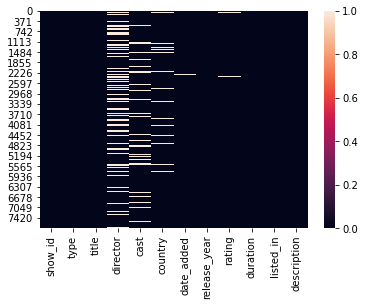

In [328]:
sns.heatmap(data.isnull()) # Shows null values as heat-map using seaborn library

Null Values are represented by White Lines in the above heatmap.

**Finding Data about a specific show**

In [329]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [330]:
data[data["title"].isin(["Narcos"])] # Will find records containing string "Narcos" in any column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4401,s4402,TV Show,Narcos,NaN,"Wagner Moura, Pedro Pascal, Boyd Holbrook, Dam...","United States, Colombia, Mexico","September 1, 2017",2017,TV-MA,3 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas",The true story of Colombia's infamously violen...


**What year had the highest number of releases? Shown using a Bar Graph**

In [331]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Convert object data-type for date_added to datetime format.

In [332]:
data['Date_Formatted'] = pd.to_datetime(data["date_added"])

In [333]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [334]:
data.dtypes

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added                object
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
Date_Formatted    datetime64[ns]
dtype: object

In [335]:
data["Date_Formatted"].dt.year.value_counts() # Counts how many occurrences of each individual year in Date_Formatted column from most to least

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_Formatted, dtype: int64

<AxesSubplot:>

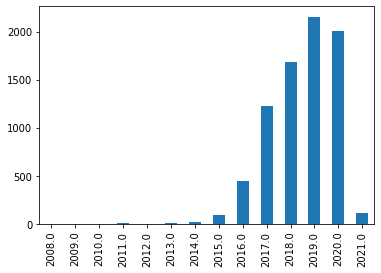

In [336]:
data["Date_Formatted"].dt.year.value_counts().sort_index().plot(kind='bar') # Creates bar graph ordered by year

**How many TV Shows and Movies are in the dataset?**

In [337]:
data.groupby('type').type.count() # Groups by type (TV Show, Movie) and shows count

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:>

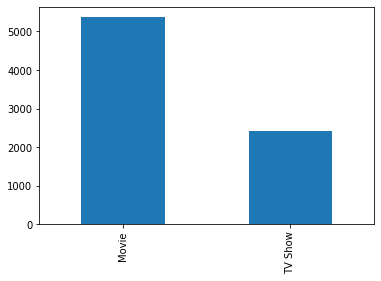

In [338]:
data["type"].value_counts().plot(kind='bar') # Shows the count of unique values in each type using a bar graph

**Identify all movies from a specific year. For this example, 2008.**

In [339]:
data[ (data['type'] == 'Movie') & (data['release_year'] == 2008) ] # Will filter the data based on the year of release

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15
50,s51,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...","United States, South Africa","June 1, 2019",2008,PG-13,109 min,Action & Adventure,Fierce mammoth hunter D'Leh sets out on an imp...,2019-06-01
77,s78,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,"June 1, 2020",2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...,2020-06-01
249,s250,Movie,A Very Special Love,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Dante Rivero,...",Philippines,"November 12, 2020",2008,TV-G,107 min,"International Movies, Romantic Movies",After landing a job working for her longtime c...,2020-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,s7620,Movie,Wild Child,Nick Moore,"Emma Roberts, Kimberley Nixon, Juno Temple, Li...","United States, United Kingdom, France","November 1, 2019",2008,PG-13,98 min,"Comedies, Romantic Movies",When a spoiled girl pushes her father too far ...,2019-11-01
7691,s7692,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ...",2018-03-01
7705,s7706,Movie,Yes Man,Peyton Reed,"Jim Carrey, Zooey Deschanel, Bradley Cooper, J...","United States, United Kingdom","January 1, 2020",2008,PG-13,104 min,"Comedies, Romantic Movies","After a bitter divorce, a bank drone falls und...",2020-01-01
7728,s7729,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,2019-09-01


We can see see that in 2008 there were 102 Movies released in the dataset.

**Show the Title, Duration, and Country of all TV Shows made in Mexico in the dataset**

In [340]:
# Will use filter all type TV Shows that were not produced in the United States and India and display their Title and Duration.
data[ (data['type']=="TV Show") & (data["country"].str.contains("Mexico")== True) ] [['title','duration','country']]

,title,duration,country
12,1994,1 Season,Mexico
800,Becoming Champions,1 Season,Mexico
1186,Camelia la Texana,1 Season,"Mexico, United States"
1437,Club of Crows,4 Seasons,Mexico
1490,Control Z,1 Season,Mexico
1534,Crime Diaries: Night Out,1 Season,Mexico
1535,Crime Diaries: The Candidate,1 Season,Mexico
1594,Dandy,1 Season,Mexico
1613,Dark Desire,1 Season,Mexico
1742,Diablero,2 Seasons,Mexico


**Show top 20 Directors that have the most Movies and TV Shows in the dataset**

In [341]:
data["director"].value_counts().head(20) # Displays top 20 directors based on numbers of titles in the dataset

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Kunle Afolayan             8
Johnnie To                 8
Lance Bangs                8
Ryan Polito                8
Hakan Algül                8
Robert Rodriguez           8
Quentin Tarantino          8
Shannon Hartman            8
Don Michael Paul           7
Justin G. Dyck             7
Fernando Ayllón            7
Name: director, dtype: int64

**Shows all Movies that have the type Comedies**

In [342]:
data[ (data['type']=="Movie") & (data['listed_in'].str.contains("Comedies"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,"June 1, 2019",2014,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019-06-01
37,s38,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,"June 1, 2019",2016,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin...",2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019-05-21
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019-12-15
7772,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,"July 1, 2017",2016,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017-07-01
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01


**How many Movie/TV Shows have Tim Allen as part of the cast?**

In [343]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [344]:
data[data['cast'].str.contains("Tim Allen")==True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
1372,s1373,Movie,Christmas with the Kranks,Joe Roth,"Tim Allen, Jamie Lee Curtis, Dan Aykroyd, Erik...",United States,"January 1, 2019",2004,PG,99 min,"Children & Family Movies, Comedies",When Luther Krank and his wife opt to skip Chr...,2019-01-01
1944,s1945,Movie,El Camino Christmas,David E. Talbert,"Jessica Alba, Tim Allen, Dax Shepard, Vincent ...",United States,"December 8, 2017",2017,TV-MA,89 min,"Comedies, Dramas",Stuck in a liquor store during an alleged robb...,2017-12-08
7089,s7090,Movie,Tim Allen: Men Are Pigs,Ellen Brown,Tim Allen,United States,"December 31, 2018",1990,TV-MA,30 min,Stand-Up Comedy,Standup comedian Tim Allen delivers a set dedi...,2018-12-31
7090,s7091,Movie,Tim Allen: ReWires America,NaN,Tim Allen,United States,"December 31, 2018",1991,TV-MA,30 min,Stand-Up Comedy,Standup star Tim Allen storms the stage for a ...,2018-12-31
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


As shown above there are a total of 5 titles that include Tim Allen in the cast.

**Remove all NaN values**

In [345]:
df_new = data.dropna()

In [346]:
df_new.info

<bound method DataFrame.info of      show_id     type       title           director  \
1         s2    Movie        7:19  Jorge Michel Grau   
2         s3    Movie       23:59       Gilbert Chan   
3         s4    Movie           9        Shane Acker   
4         s5    Movie          21     Robert Luketic   
5         s6  TV Show          46        Serdar Akar   
...      ...      ...         ...                ...   
7778   s7779    Movie  Zombieland    Ruben Fleischer   
7780   s7781    Movie         Zoo       Shlok Sharma   
7781   s7782    Movie        Zoom       Peter Hewitt   
7782   s7783    Movie        Zozo        Josef Fares   
7783   s7784    Movie      Zubaan        Mozez Singh   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   


**Display titles and duration that contain Angelina Jolie in the cast**

In [347]:
df_new[df_new['cast'].str.contains("Angelina Jolie")][['title','duration']]

,title,duration
1155,By the Sea,122 min
3466,Kung Fu Panda: Holiday,26 min
6933,The Tourist,103 min


**What are the different ratings used in the dataset?**

In [348]:
df_new['rating'].nunique() 

14

There are 14 different ratings used in Netflix. The different ratings are listed below.

In [349]:
df_new['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**How many Movies got "TV-MA" in Canada?**

In [350]:
df_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20


In [351]:
df_new[ (df_new['type']=="Movie") & (df_new['rating']=='TV-MA') & (df_new['country']=='Canada')].shape

(37, 13)

The shape function shows that there are 37 Movies rated TV-MA from Canada in the dataset. They are listed below.

In [352]:
df_new[ (df_new['type']=="Movie") & (df_new['rating']=='TV-MA') & (df_new['country']=='Canada')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
261,s262,Movie,A.M.I.,Rusty Nixon,"Debs Howard, Philip Granger, Sam Robert Muik, ...",Canada,"October 1, 2020",2019,TV-MA,77 min,Horror Movies,"After losing her mother, a teenage girl bonds ...",2020-10-01
296,s297,Movie,Across The Line,Julien Christian Lutz,"Sarah Jeffery, Simon Paul Mutuyimana, Denis Th...",Canada,"April 1, 2019",2015,TV-MA,88 min,"Dramas, Sports Movies",A black high school student sets his sights fo...,2019-04-01
464,s465,Movie,American Hangman,Wilson Coneybeare,"Donald Sutherland, Vincent Kartheiser, Oliver ...",Canada,"July 30, 2019",2019,TV-MA,99 min,Thrillers,A judge’s kidnapping is streamed live on socia...,2019-07-30
827,s828,Movie,Below Her Mouth,April Mullen,"Erika Linder, Natalie Krill, Sebastian Pigott,...",Canada,"August 1, 2017",2016,TV-MA,91 min,"Dramas, Independent Movies, International Movies",An engaged fashion editor begins a torrid affa...,2017-08-01
853,s854,Movie,"Best Wishes, Warmest Regards: A Schitt's Creek...",Amy Segal,"Daniel Levy, Eugene Levy, Catherine O'Hara, An...",Canada,"October 3, 2020",2020,TV-MA,44 min,"Documentaries, LGBTQ Movies","From unseen footage to the last table read, th...",2020-10-03
937,s938,Movie,Birthmarked,Emanuel Hoss-Desmarais,"Toni Collette, Matthew Goode, Andreas Apergis,...",Canada,"June 28, 2018",2018,TV-MA,88 min,"Comedies, Independent Movies, International Mo...","In an attempt to settle the ""nature vs. nurtur...",2018-06-28
1037,s1038,Movie,Bon Cop Bad Cop 2,Alain Desrochers,"Patrick Huard, Colm Feore, Marc Beaupré, Noam ...",Canada,"November 11, 2017",2017,TV-MA,126 min,"Action & Adventure, Comedies, International Mo...",Two veteran buddy cops are back for a second c...,2017-11-11
1038,s1039,Movie,"Bon Cop, Bad Cop",Erik Canuel,"Patrick Huard, Colm Feore, Sylvain Marcel, Luc...",Canada,"March 15, 2017",2006,TV-MA,117 min,"Action & Adventure, Comedies, International Mo...",An English-speaking officer from Toronto and a...,2017-03-15
1446,s1447,Movie,Code 8,Jeff Chan,"Robbie Amell, Stephen Amell, Sung Kang, Kari M...",Canada,"April 11, 2020",2019,TV-MA,98 min,"Action & Adventure, Independent Movies, Intern...",In a city where super-powered people are ostra...,2020-04-11
1637,s1638,Movie,David Foster: Off the Record,Barry Avrich,David Foster,Canada,"July 1, 2020",2019,TV-MA,107 min,"Documentaries, Music & Musicals","From child prodigy to iconic music producer, D...",2020-07-01


**How many TV Shows were rated TV-14 after year 2017?**

In [353]:
df_new[ (df_new['type']=="TV Show") & (df_new['rating']=="TV-14") & (df_new['release_year'] > 2017)].shape

(19, 13)

19 TV Shows were rated after year 2017. 

A list of them is below:

In [354]:
df_new[ (df_new['type']=="TV Show") & (df_new['rating']=="TV-14") & (df_new['release_year'] > 2017)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Formatted
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...,2020-11-11
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...,2018-03-09
584,s585,TV Show,Arrow,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,"February 5, 2020",2019,TV-14,8 Seasons,"Crime TV Shows, TV Action & Adventure","Based on DC Comics' Green Arrow, an affluent p...",2020-02-05
1470,s1471,TV Show,Comedians in Cars Getting Coffee,Jerry Seinfeld,Jerry Seinfeld,United States,"July 19, 2019",2019,TV-14,6 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",Jerry Seinfeld's roving talk show combines cof...,2019-07-19
1647,s1648,TV Show,DC's Legends of Tomorrow,Rob Seidenglanz,"Victor Garber, Brandon Routh, Caity Lotz, Fran...",United States,"June 10, 2020",2020,TV-14,5 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","A mysterious ""time master"" from the future uni...",2020-06-10
3118,s3119,TV Show,James Acaster: Repertoire,Dan Lucchesi,James Acaster,United Kingdom,"March 27, 2018",2018,TV-14,1 Season,"British TV Shows, International TV Shows, Stan...",Offbeat comic James Acaster covers the strange...,2018-03-27
4033,s4034,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"August 10, 2020",2020,TV-14,5 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...,2020-08-10
5226,s5227,TV Show,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,"May 14, 2020",2019,TV-14,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r...",2020-05-14
5436,s5437,TV Show,Scissor Seven,He Xiaofeng,"He Xiaofeng, Jiang Guangtao, Duan Yixuan, Zhu ...",China,"May 7, 2020",2020,TV-14,2 Seasons,"International TV Shows, TV Action & Adventure,...","Seeking to recover his memory, a scissor-wield...",2020-05-07


<AxesSubplot:>

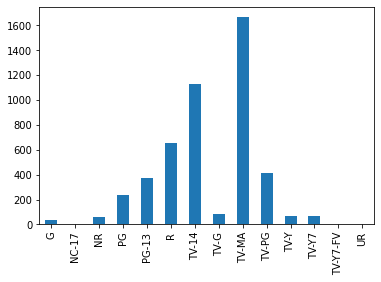

In [362]:
df_new["rating"].value_counts().sort_index().plot(kind='bar') # Shows total ratings of dataset.

In [360]:
df_ratings = df_new[df_new['release_year']>2015]

<AxesSubplot:>

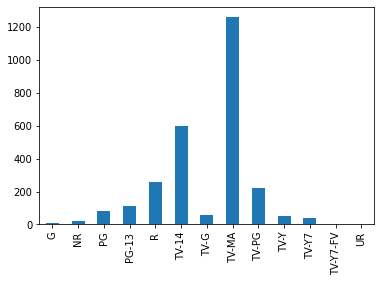

In [361]:
df_ratings["rating"].value_counts().sort_index().plot(kind='bar') #Shows total ratings of releases after 2015

More Movies/Shows are made for TV-MA since 2015 than compared to the average of the dataset.